### Chapter 3: Getting Started with Neural Netwrk

In [1]:
from myutils import *

In [2]:
# import
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import imdb

Using Theano backend.


### Reading imdb data

In [3]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
type(train_data)

numpy.ndarray

In [5]:
# total samples
len(train_data)

25000

In [6]:
# total columns
train_data.shape

(25000,)

In [7]:
train_data.ndim

1

In [8]:
# max seq
max(max(seq) for seq in train_data)

9999

In [9]:
word_index = imdb.get_word_index()

In [18]:
word_index['unknown']

1856

In [19]:
reverse_word_index = reverse_dict(word_index)

In [20]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [21]:
decoded_review

"? my kids picked this out at the video store it's great to hear ? as dorothy cause she sounds just like her mom but there are too many bad songs and the animation is pretty crude compared to other cartoons of that time"

In [22]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
decoded_review

"? by 1987 hong kong had given the world such films as sammo ? encounters of the spooky ? ? ? fat in john ? iconic a better ? zu ? and the classic mr ? jackie chan was having international success on video but it was with a chinese ghost ? that hk cinema had its first real ? theatrical hit in the west for many years br br western ? had never seen anything like it it was a film that took various ingredients that hk cinema had used for years flying ? wildly choreographed martial arts and the supernatural and ? them to create a film that was unique in its look feel and execution forget the poor and unnecessary sequels it ? this is the original and best br br director ? ? ? still best known as an action choreographer on such films as ? a better tomorrow ? 'the ? has under the ? eye of legendary producer tsui ? created a masterpiece of fantasy horror cinema and with such an expert crew at his ? no less than 6 martial arts ? the chances of the film being anything but wonderful would be ? br 

In [23]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [31]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 20s 1ms/step - loss: 0.6713 - acc: 0.6331 - val_loss: 0.6442 - val_acc: 0.7282
Epoch 2/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.6074 - acc: 0.7899 - val_loss: 0.5821 - val_acc: 0.7917
Epoch 3/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.5407 - acc: 0.8388 - val_loss: 0.5271 - val_acc: 0.8237
Epoch 4/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.4834 - acc: 0.8637 - val_loss: 0.4820 - val_acc: 0.8437
Epoch 5/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.4347 - acc: 0.8802 - val_loss: 0.4436 - val_acc: 0.8515
Epoch 6/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.3934 - acc: 0.8931 - val_loss: 0.4123 - val_acc: 0.8577
Epoch 7/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.3570 - acc: 0.9009 - val_loss: 0.3847 - v

In [33]:
history_dict = history.history

In [38]:
print(history_dict.keys())
print(history_dict)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
{'val_loss': [0.64419606571197507, 0.58213538026809697, 0.52706877994537349, 0.48199873642921448, 0.44362451009750364, 0.412270471572876, 0.38467080950736998, 0.36367818508148192, 0.3465432487010956, 0.33089964742660521, 0.32222939591407773, 0.31018504652976991, 0.30299778871536254, 0.29698243675231933, 0.29246214447021485, 0.28924228463172913, 0.28733305144309995, 0.2865668110847473, 0.2848548496723175, 0.28500430965423584], 'val_acc': [0.72819999971389771, 0.79169999971389771, 0.82370000038146973, 0.84369999923706052, 0.85149999933242793, 0.85769999952316289, 0.86579999952316289, 0.86829999952316284, 0.87229999971389771, 0.87759999990463256, 0.87679999971389766, 0.88090000000000002, 0.88270000009536742, 0.8828000001907349, 0.88330000009536747, 0.88210000019073487, 0.88440000057220458, 0.88450000047683719, 0.88390000057220464, 0.88220000038146973], 'loss': [0.6712846795717875, 0.60736466604868566, 0.54069635117848713, 0.483398105239868

In [35]:
import matplotlib.pyplot as plt

In [36]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [39]:
epochs = range(1, len(history_dict['acc']) + 1)

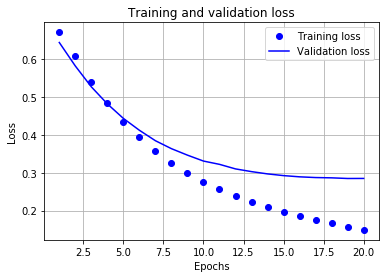

In [41]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

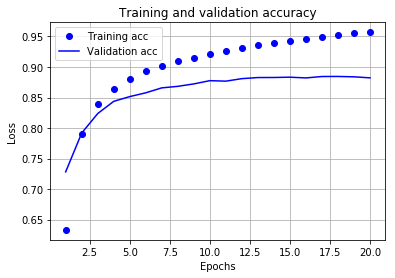

In [45]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Building another neural net with less no of input

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 18s 1ms/step - loss: 0.6860 - acc: 0.5980 - val_loss: 0.6750 - val_acc: 0.6742
Epoch 2/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.6565 - acc: 0.7405 - val_loss: 0.6412 - val_acc: 0.7687
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.6192 - acc: 0.8099 - val_loss: 0.6078 - val_acc: 0.8038
Epoch 4/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.5827 - acc: 0.8430 - val_loss: 0.5765 - val_acc: 0.8245
Epoch 5/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.5489 - acc: 0.8598 - val_loss: 0.5474 - val_acc: 0.8373
Epoch 6/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.5171 - acc: 0.8705 - val_loss: 0.5200 - val_acc: 0.8398
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.4874 - acc: 0.8772 - val_loss: 0.4954 - v

In [49]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 13s 533us/step


In [50]:
results

[0.32921555925369261, 0.87744]